## Predicting SQL Injection

### Import libraries

In [1]:
import glob
import time
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from nltk import ngrams
from nltk.tokenize import sent_tokenize
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.stem import PorterStemmer
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize
import warnings
warnings.filterwarnings("ignore")

[nltk_data] Downloading package punkt to /Users/riyagupta/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/riyagupta/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/riyagupta/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


### Import Dataset

In [2]:
df = pd.read_csv("data/sqliv.csv",encoding='utf-16')

In [3]:
df

,Sentence,Label
0,a,1
1,a',1
2,a' --,1
3,a' or 1 = 1; --,1
4,@,1
...,...,...
4195,"org/?option = com_k2 <a href = ""http://corfopym",0
4196,com/?option = com_k2 <act> <![CDATA[procMemb...,0
4197,picsearch,0
4198,com/is?-WZx-uhyLezKNiYLvAbKL3W4oh5F749nr2KUmFF...,0


### Data Preprocessing

In [4]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer( min_df=2, max_df=0.7, stop_words=stopwords.words('english'))
posts = vectorizer.fit_transform(df['Sentence'].values.astype('U')).toarray()

In [5]:
transformed_posts=pd.DataFrame(posts)

In [6]:
df=pd.concat([df,transformed_posts],axis=1)

### Splitting the dataset

In [7]:
X=df[df.columns[2:]]

In [8]:
y=df['Label']

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Training the model

In [11]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0)
clf = clf.fit(X_train, y_train)

In [12]:
from sklearn.metrics import accuracy_score

In [13]:
y_pred=clf.predict(X_test)

In [14]:
accuracy_score(y_test, y_pred)

0.9285714285714286

### Classification

In [15]:
from keras.models import Sequential
from keras import layers
from keras.preprocessing.text import Tokenizer
from keras.wrappers.scikit_learn import KerasClassifier

In [16]:
input_dim = X_train.shape[1]  # Number of features

model = Sequential()
model.add(layers.Dense(20, input_dim=input_dim, activation='relu'))
model.add(layers.Dense(10,  activation='tanh'))
model.add(layers.Dense(1024, activation='relu'))

model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))


### Compile the model

In [17]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 20)                94360     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                210       
_________________________________________________________________
dense_2 (Dense)              (None, 1024)              11264     
_________________________________________________________________
batch_normalization (BatchNo (None, 1024)              4096      
_________________________________________________________________
dropout (Dropout)            (None, 1024)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 1025      
Total params: 110,955
Trainable params: 108,907
Non-trainable params: 2,048
______________________________________________

In [18]:
classifier_cnn = model.fit(X_train,y_train, epochs=10,verbose=True, batch_size=15, validation_data=(X_test, y_test))

Epoch 1/10
224/224 [==============================] - 1s 3ms/step - loss: 0.2177 - accuracy: 0.9077 - val_loss: 0.6924 - val_accuracy: 0.7000
Epoch 2/10
224/224 [==============================] - 0s 2ms/step - loss: 0.1154 - accuracy: 0.9563 - val_loss: 0.3730 - val_accuracy: 0.7190
Epoch 3/10
224/224 [==============================] - 0s 2ms/step - loss: 0.0867 - accuracy: 0.9670 - val_loss: 0.0701 - val_accuracy: 0.9798
Epoch 4/10
224/224 [==============================] - 0s 2ms/step - loss: 0.0768 - accuracy: 0.9759 - val_loss: 0.0597 - val_accuracy: 0.9762
Epoch 5/10
224/224 [==============================] - 1s 2ms/step - loss: 0.0879 - accuracy: 0.9688 - val_loss: 0.0837 - val_accuracy: 0.9726
Epoch 6/10
224/224 [==============================] - 1s 2ms/step - loss: 0.0806 - accuracy: 0.9723 - val_loss: 0.0858 - val_accuracy: 0.9738
Epoch 7/10
224/224 [==============================] - 0s 2ms/step - loss: 0.0683 - accuracy: 0.9759 - val_loss: 0.0673 - val_accuracy: 0.9774
Epoch 

### Predicting the test data

In [19]:
pred = model.predict(X_test)

In [20]:
for i in range(len(pred)):
    if pred[i]>0.5:
        pred[i]=1
    elif pred[i]<=0.5:
        pred[i]=0

In [21]:
acc = accuracy_score(y_test,pred)
acc

0.9785714285714285

### Confusion Matrix

In [22]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
cm = confusion_matrix(y_test, pred)

print('Confusion Matrix: ')
print(cm)
as1 = accuracy_score(y_test, pred)
ps1 = precision_score(y_test, pred)
rs1 = recall_score(y_test, pred)
f1s1 = f1_score(y_test, pred)
print('Accuracy Score: ',as1)
print('Precision Score: ',ps1)
print('Recall Score: ',rs1)
print('F1 Score: ',f1s1)

Confusion Matrix: 
[[570  18]
 [  0 252]]
Accuracy Score:  0.9785714285714285
Precision Score:  0.9333333333333333
Recall Score:  1.0
F1 Score:  0.9655172413793104


### Classification Report

In [23]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred, target_names=['Normal SQL Query', 'SQL Injection Detected']))

                        precision    recall  f1-score   support

      Normal SQL Query       1.00      0.97      0.98       588
SQL Injection Detected       0.93      1.00      0.97       252

              accuracy                           0.98       840
             macro avg       0.97      0.98      0.97       840
          weighted avg       0.98      0.98      0.98       840



### Heat Map for CNN

<AxesSubplot:>

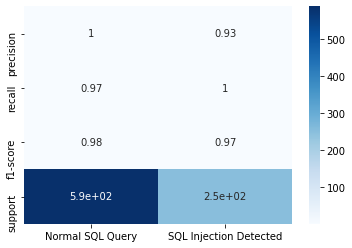

In [24]:
clf_report = classification_report(y_test, pred, target_names=['Normal SQL Query', 'SQL Injection Detected'], output_dict=True)
cleaned_report = {}

cleaned_report['Normal SQL Query'] = clf_report['Normal SQL Query']
cleaned_report['SQL Injection Detected'] = clf_report['SQL Injection Detected']

sns.heatmap(pd.DataFrame(cleaned_report), annot=True, cmap="Blues")

### Using different algorithms to get the best accuracy

#### Gaussian Naive Bayes

In [25]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()

gnb.fit(X_train, y_train)

pred_gnb = gnb.predict(X_test)

#### SVM

In [26]:
from sklearn.svm import SVC
clf = SVC(gamma='auto')
clf.fit(X_train, y_train)
pred_svm=clf.predict(X_test)

#### KNN

In [27]:
from sklearn.neighbors import KNeighborsClassifier

neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train)

pred_knn = neigh.predict(X_test)

#### Decision Tree

In [28]:
from sklearn import tree

dt = tree.DecisionTreeClassifier()
dt = dt.fit(X_train, y_train)

pred_dt = dt.predict(X_test)

### Confusion Matrix for the different algorithms

In [29]:
cm_cnn = confusion_matrix(y_test, pred)
print('For CNN')
print('Confusion Matrix: ')
print(cm_cnn)
as1 = accuracy_score(y_test, pred)
ps1 = precision_score(y_test, pred)
rs1 = recall_score(y_test, pred)
f1s1 = f1_score(y_test, pred)
print('Accuracy Score: ',as1)
print('Precision Score: ',ps1)
print('Recall Score: ',rs1)
print('F1 Score: ',f1s1)

For CNN
Confusion Matrix: 
[[570  18]
 [  0 252]]
Accuracy Score:  0.9785714285714285
Precision Score:  0.9333333333333333
Recall Score:  1.0
F1 Score:  0.9655172413793104


In [30]:
cm_gnb = confusion_matrix(y_test, pred_gnb)
print('For Naive Bayes')
print('Confusion Matrix: ')
print(cm_gnb)
as2 = accuracy_score(y_test, pred_gnb)
ps2 = precision_score(y_test, pred_gnb)
rs2 = recall_score(y_test, pred_gnb)
f1s2 = f1_score(y_test, pred_gnb)
print('Accuracy Score: ',as2)
print('Precision Score: ',ps2)
print('Recall Score: ',rs2)
print('F1 Score: ',f1s2)

For Naive Bayes
Confusion Matrix: 
[[569  19]
 [  0 252]]
Accuracy Score:  0.9773809523809524
Precision Score:  0.9298892988929889
Recall Score:  1.0
F1 Score:  0.9636711281070746


In [31]:
cm_svm = confusion_matrix(y_test, pred_svm)
print('For SVM')
print('Confusion Matrix: ')
print(cm_svm)
as3 = accuracy_score(y_test, pred_svm)
ps3 = precision_score(y_test, pred_svm)
rs3 = recall_score(y_test, pred_svm)
f1s3 = f1_score(y_test, pred_svm)
print('Accuracy Score: ',as3)
print('Precision Score: ',ps3)
print('Recall Score: ',rs3)
print('F1 Score: ',f1s3)

For SVM
Confusion Matrix: 
[[588   0]
 [198  54]]
Accuracy Score:  0.7642857142857142
Precision Score:  1.0
Recall Score:  0.21428571428571427
F1 Score:  0.35294117647058826


In [32]:
cm_knn = confusion_matrix(y_test, pred_knn)
print('For KNN')
print('Confusion Matrix: ')
print(cm_knn)
as4 = accuracy_score(y_test, pred_knn)
ps4 = precision_score(y_test, pred_knn)
rs4 = recall_score(y_test, pred_knn)
f1s4 = f1_score(y_test, pred_knn)
print('Accuracy Score: ',as4)
print('Precision Score: ',ps4)
print('Recall Score: ',rs4)
print('F1 Score: ',f1s4)

For KNN
Confusion Matrix: 
[[225 363]
 [  0 252]]
Accuracy Score:  0.5678571428571428
Precision Score:  0.4097560975609756
Recall Score:  1.0
F1 Score:  0.5813148788927336


In [33]:
cm_dt = confusion_matrix(y_test, pred_dt)
print('For Decision Tree')
print('Confusion Matrix: ')
print(cm_dt)
as5 = accuracy_score(y_test, pred_dt)
ps5 = precision_score(y_test, pred_dt)
rs5 = recall_score(y_test, pred_dt)
f1s5 = f1_score(y_test, pred_dt)
print('Accuracy Score: ',as5)
print('Precision Score: ',ps5)
print('Recall Score: ',rs5)
print('F1 Score: ',f1s5)

For Decision Tree
Confusion Matrix: 
[[479 109]
 [  0 252]]
Accuracy Score:  0.8702380952380953
Precision Score:  0.6980609418282548
Recall Score:  1.0
F1 Score:  0.8221859706362153


### Classification Report for the different algorithms

In [34]:
print('For CNN')
print(classification_report(y_test, pred, target_names=['Normal SQL Query', 'SQL Injection Detected']))
print('-----------------------------------------------------------------')
print('For Naive Bayes')
print(classification_report(y_test, pred_gnb, target_names=['Normal SQL Query', 'SQL Injection Detected']))
print('-----------------------------------------------------------------')
print('For SVM')
print(classification_report(y_test, pred_svm, target_names=['Normal SQL Query', 'SQL Injection Detected']))
print('-----------------------------------------------------------------')
print('For KNN')
print(classification_report(y_test, pred_knn, target_names=['Normal SQL Query', 'SQL Injection Detected']))
print('-----------------------------------------------------------------')
print('For Decision Tree')
print(classification_report(y_test, pred_dt, target_names=['Normal SQL Query', 'SQL Injection Detected']))

For CNN
                        precision    recall  f1-score   support

      Normal SQL Query       1.00      0.97      0.98       588
SQL Injection Detected       0.93      1.00      0.97       252

              accuracy                           0.98       840
             macro avg       0.97      0.98      0.97       840
          weighted avg       0.98      0.98      0.98       840

-----------------------------------------------------------------
For Naive Bayes
                        precision    recall  f1-score   support

      Normal SQL Query       1.00      0.97      0.98       588
SQL Injection Detected       0.93      1.00      0.96       252

              accuracy                           0.98       840
             macro avg       0.96      0.98      0.97       840
          weighted avg       0.98      0.98      0.98       840

-----------------------------------------------------------------
For SVM
                        precision    recall  f1-score   suppor

### Heat Map for the different Algorithms

For CNN, Confusion Matrix: 
[[570  18]
 [  0 252]]


<AxesSubplot:>

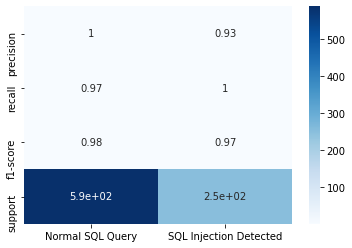

In [35]:
clf_report1 = classification_report(y_test, pred, target_names=['Normal SQL Query', 'SQL Injection Detected'], output_dict=True)
cleaned_report1 = {}

cleaned_report1['Normal SQL Query'] = clf_report1['Normal SQL Query']
cleaned_report1['SQL Injection Detected'] = clf_report1['SQL Injection Detected']

print('For CNN, Confusion Matrix: ')
print(cm_cnn)
sns.heatmap(pd.DataFrame(cleaned_report1), annot=True, cmap="Blues")

For Naive Bayes
[[569  19]
 [  0 252]]


<AxesSubplot:>

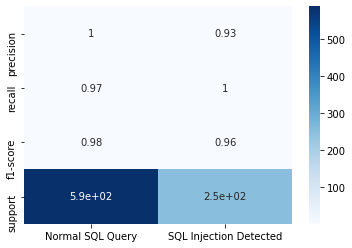

In [36]:
clf_report2 = classification_report(y_test, pred_gnb, target_names=['Normal SQL Query', 'SQL Injection Detected'], output_dict=True)
cleaned_report2 = {}

cleaned_report2['Normal SQL Query'] = clf_report2['Normal SQL Query']
cleaned_report2['SQL Injection Detected'] = clf_report2['SQL Injection Detected']

print('For Naive Bayes')
print(cm_gnb)
sns.heatmap(pd.DataFrame(cleaned_report2), annot=True, cmap="Blues")

For SVM
[[588   0]
 [198  54]]


<AxesSubplot:>

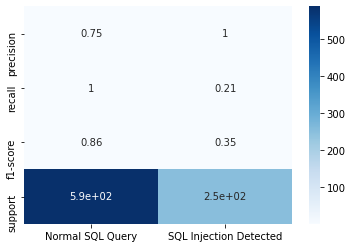

In [37]:
clf_report3 = classification_report(y_test, pred_svm, target_names=['Normal SQL Query', 'SQL Injection Detected'], output_dict=True)
cleaned_report3 = {}

cleaned_report3['Normal SQL Query'] = clf_report3['Normal SQL Query']
cleaned_report3['SQL Injection Detected'] = clf_report3['SQL Injection Detected']

print('For SVM')
print(cm_svm)
sns.heatmap(pd.DataFrame(cleaned_report3), annot=True, cmap="Blues")

For KNN
[[225 363]
 [  0 252]]


<AxesSubplot:>

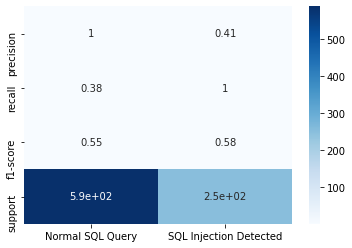

In [38]:
clf_report4 = classification_report(y_test, pred_knn, target_names=['Normal SQL Query', 'SQL Injection Detected'], output_dict=True)
cleaned_report4 = {}

cleaned_report4['Normal SQL Query'] = clf_report4['Normal SQL Query']
cleaned_report4['SQL Injection Detected'] = clf_report4['SQL Injection Detected']

print('For KNN')
print(cm_knn)
sns.heatmap(pd.DataFrame(cleaned_report4), annot=True, cmap="Blues")

For Decision Tree
[[479 109]
 [  0 252]]


<AxesSubplot:>

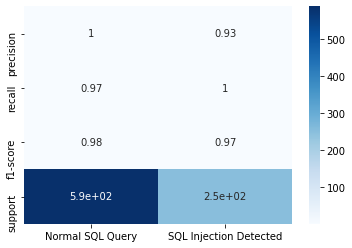

In [39]:
clf_report5 = classification_report(y_test, pred_dt, target_names=['Normal SQL Query', 'SQL Injection Detected'], output_dict=True)
cleaned_report5 = {}

cleaned_report5['Normal SQL Query'] = clf_report5['Normal SQL Query']
cleaned_report5['SQL Injection Detected'] = clf_report5['SQL Injection Detected']

print('For Decision Tree')
print(cm_dt)
sns.heatmap(pd.DataFrame(cleaned_report1), annot=True, cmap="Blues")

In [40]:
accuracies = {"CNN": as1,  
             "Naive": as2, 
             "SVM": as3,
             "KNN": as4, 
             "DT": as5 
             }

precisions = {"CNN": ps1,  
             "Naive": ps2, 
             "SVM": ps3,
             "KNN": ps4, 
             "DT": ps5
             }

recalls = {"CNN": rs1,  
             "Naive": rs2, 
             "SVM": rs3,
             "KNN": rs4, 
             "DT": rs5
             }

f1s = {"CNN": f1s1,  
             "Naive": f1s2, 
             "SVM": f1s3,
             "KNN": f1s4, 
             "DT": f1s5
             }

In [41]:
print("Classification models in descending order of Accuracy:")
sorted(accuracies.items(), key=lambda x: x[1],reverse=True)

Classification models in descending order of Accuracy:


[('CNN', 0.9785714285714285),
 ('Naive', 0.9773809523809524),
 ('DT', 0.8702380952380953),
 ('SVM', 0.7642857142857142),
 ('KNN', 0.5678571428571428)]

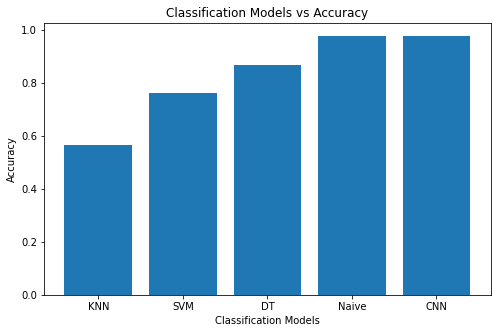

In [42]:
lists = sorted(accuracies.items(), key=lambda x: x[1]*100) # sorted by key, return a list of tuples

plt.figure(figsize=(8,5))
plt.bar(*zip(*lists))

plt.title('Classification Models vs Accuracy')
plt.xlabel('Classification Models')
plt.ylabel('Accuracy')
plt.show()

In [43]:
print("Classification models in descending order of Precision:")
sorted(precisions.items(), key=lambda x: x[1],reverse=True)

Classification models in descending order of Precision:


[('SVM', 1.0),
 ('CNN', 0.9333333333333333),
 ('Naive', 0.9298892988929889),
 ('DT', 0.6980609418282548),
 ('KNN', 0.4097560975609756)]

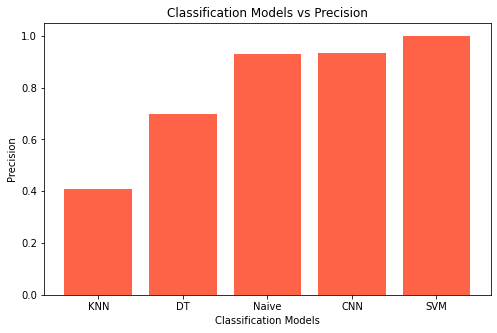

In [44]:
lists = sorted(precisions.items(), key=lambda x: x[1]*100) # sorted by key, return a list of tuples

plt.figure(figsize=(8,5))
plt.bar(*zip(*lists), color="tomato")

plt.title('Classification Models vs Precision')
plt.xlabel('Classification Models')
plt.ylabel('Precision')
plt.show()

In [45]:
print("Classification models in descending order of Recall:")
sorted(recalls.items(), key=lambda x: x[1],reverse=True)

Classification models in descending order of Recall:


[('CNN', 1.0),
 ('Naive', 1.0),
 ('KNN', 1.0),
 ('DT', 1.0),
 ('SVM', 0.21428571428571427)]

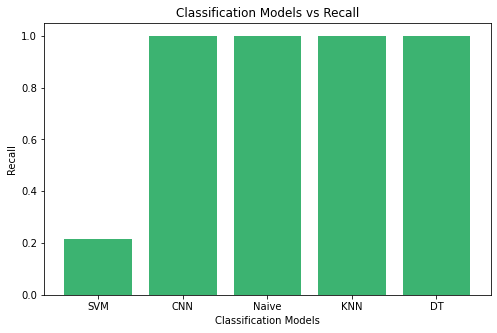

In [46]:
lists = sorted(recalls.items(), key=lambda x: x[1]*100) # sorted by key, return a list of tuples

plt.figure(figsize=(8,5))
plt.bar(*zip(*lists), color="mediumseagreen")

plt.title('Classification Models vs Recall')
plt.xlabel('Classification Models')
plt.ylabel('Recall')
plt.show()

In [47]:
print("Classification models in descending order of F1:")
sorted(f1s.items(), key=lambda x: x[1],reverse=True)

Classification models in descending order of F1:


[('CNN', 0.9655172413793104),
 ('Naive', 0.9636711281070746),
 ('DT', 0.8221859706362153),
 ('KNN', 0.5813148788927336),
 ('SVM', 0.35294117647058826)]

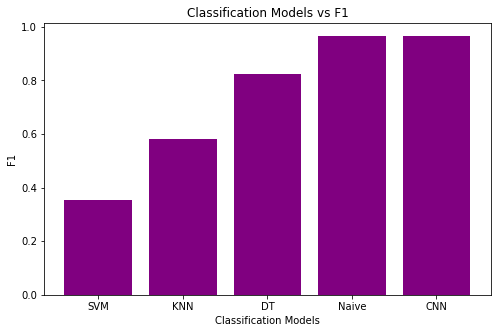

In [48]:
lists = sorted(f1s.items(), key=lambda x: x[1]*100) # sorted by key, return a list of tuples

plt.figure(figsize=(8,5))
plt.bar(*zip(*lists), color="purple")

plt.title('Classification Models vs F1')
plt.xlabel('Classification Models')
plt.ylabel('F1')
plt.show()

### Saving the model

In [49]:
from keras.models import load_model
import pickle

model.save('model_cnn.h5')
with open('vectorizer_cnn', 'wb') as fin:
    pickle.dump(vectorizer, fin)


### User Prediction

In [1]:
import keras
from keras.models import load_model
import pickle
import tensorflow as tf

mymodel = tf.keras.models.load_model('model_cnn.h5')
myvectorizer = pickle.load(open("vectorizer_cnn", 'rb'))

def clean_data(input_val):

    input_val=input_val.replace('\n', '')
    input_val=input_val.replace('%20', ' ')
    input_val=input_val.replace('=', ' = ')
    input_val=input_val.replace('((', ' (( ')
    input_val=input_val.replace('))', ' )) ')
    input_val=input_val.replace('(', ' ( ')
    input_val=input_val.replace(')', ' ) ')
    input_val=input_val.replace('1 ', 'numeric')
    input_val=input_val.replace(' 1', 'numeric')
    input_val=input_val.replace("'1 ", "'numeric ")
    input_val=input_val.replace(" 1'", " numeric'")
    input_val=input_val.replace('1,', 'numeric,')
    input_val=input_val.replace(" 2 ", " numeric ")
    input_val=input_val.replace(' 3 ', ' numeric ')
    input_val=input_val.replace(' 3--', ' numeric--')
    input_val=input_val.replace(" 4 ", ' numeric ')
    input_val=input_val.replace(" 5 ", ' numeric ')
    input_val=input_val.replace(' 6 ', ' numeric ')
    input_val=input_val.replace(" 7 ", ' numeric ')
    input_val=input_val.replace(" 8 ", ' numeric ')
    input_val=input_val.replace('1234', ' numeric ')
    input_val=input_val.replace("22", ' numeric ')
    input_val=input_val.replace(" 8 ", ' numeric ')
    input_val=input_val.replace(" 200 ", ' numeric ')
    input_val=input_val.replace("23 ", ' numeric ')
    input_val=input_val.replace('"1', '"numeric')
    input_val=input_val.replace('1"', '"numeric')
    input_val=input_val.replace("7659", 'numeric')
    input_val=input_val.replace(" 37 ", ' numeric ')
    input_val=input_val.replace(" 45 ", ' numeric ')

    return input_val

def predict_sqli_attack():
    
    repeat=True
    
    beautify=''
    for i in range(20):
        beautify+= "*"

    print(beautify) 
    input_val=input("Enter a sentence : ")
 
    if input_val== '0':
        repeat=False

    input_val=clean_data(input_val)
    input_val=[input_val]

    input_val=myvectorizer.transform(input_val).toarray()

    result=mymodel.predict(input_val)
    
    if repeat == True:
        
        if result>0.5:
            print("ALERT!!!! SQL injection Detected")
        elif result<=0.5:
            print("It is normal")          
        print(beautify)
            
        predict_sqli_attack()
            
    elif repeat == False:
        print( " Closing detection ")

In [2]:
predict_sqli_attack()

********************
Enter a sentence : select * from users where id = 1 or "%?" or 1 = 1 -- 1
ALERT!!!! SQL injection Detected
********************
********************
Enter a sentence : select * from users where id = 1. union select null, version ( )
ALERT!!!! SQL injection Detected
********************
********************
Enter a sentence : The order backlog transportation unit $ 32
It is normal
********************
********************
Enter a sentence : ) )  or benchmark ( 10000000,MD5 ( 1  ) ) #
ALERT!!!! SQL injection Detected
********************
********************
Enter a sentence : In Germany , many companies global market leaders particular niche 
It is normal
********************
********************
Enter a sentence : 0
 Closing detection 
